[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLOv8 Object Detection on a Custom Dataset

---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/wuZtUMEiKWY)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## ⚠️ Disclaimer

YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **03.01.2024** with version **YOLOv8.0.196**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

## Accompanying Blog Post

We recommend that you follow along in this notebook while reading the blog post on how to train YOLOv8 Object Detection, concurrently.

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv8
- CLI Basics
- Inference with Pre-trained COCO Model
- Roboflow Universe
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [6]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [5]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **03.01.2024** with version **YOLOv8.0.196**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [2]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (4 CPUs, 15.6 GB RAM, 35.0/94.3 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [7]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 150.5ms
Speed: 5.2ms preprocess, 150.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


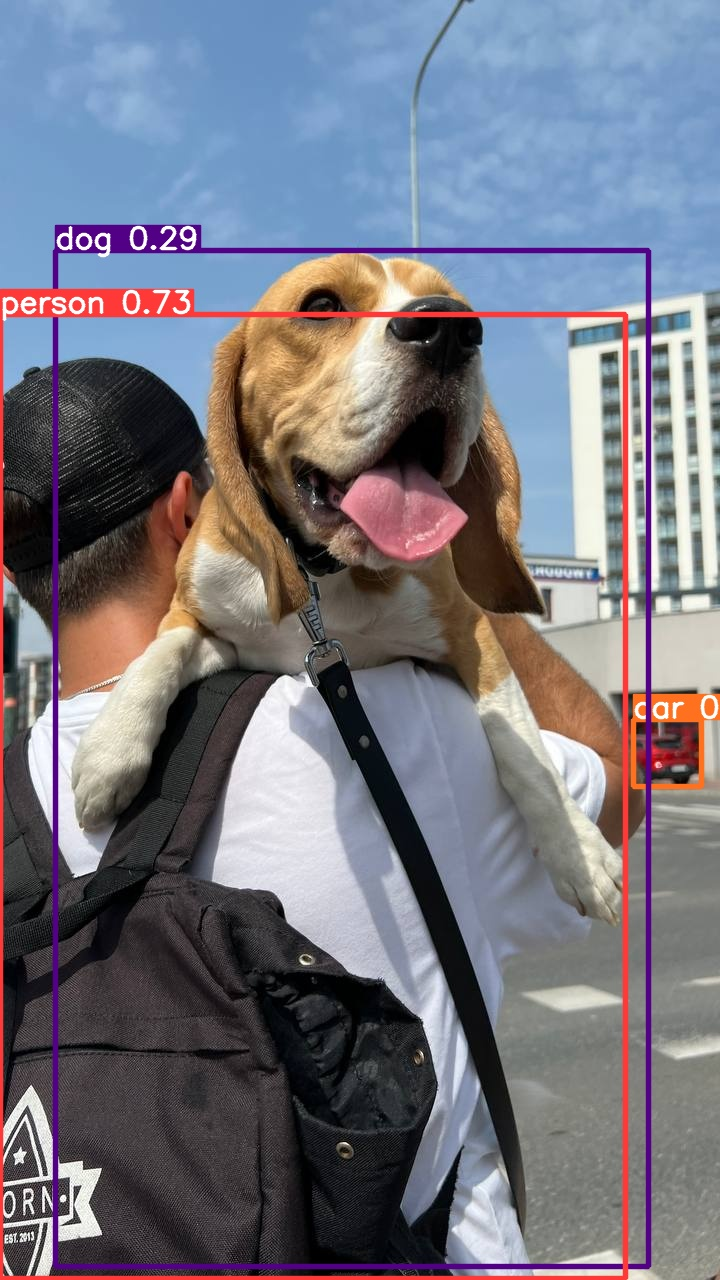

In [8]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [9]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 139.2ms
Speed: 3.8ms preprocess, 139.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)


In [ ]:
results[0].boxes.xyxy

tensor([[   0.0000,  314.4714,  625.0755, 1278.1946],
        [  55.1731,  250.0220,  648.1080, 1266.2720],
        [ 633.2291,  719.5391,  701.0538,  786.0337]])

In [ ]:
results[0].boxes.conf

tensor([0.7271, 0.2907, 0.2846])

In [ ]:
results[0].boxes.cls

tensor([ 0., 16.,  2.])

## Roboflow Universe

Need data for your project? Before spending time on annotating, check out Roboflow Universe, a repository of more than 110,000 open-source datasets that you can use in your projects. You'll find datasets containing everything from annotated cracks in concrete to plant images with disease annotations.


[![Roboflow Universe](https://media.roboflow.com/notebooks/template/uni-banner-frame.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672878480290)](https://universe.roboflow.com/)



## Preparing a custom dataset

Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format. Fortunately, Roboflow makes this process as straightforward and fast as possible. Let me show you how!

### Step 1: Creating project

Before you start, you need to create a Roboflow [account](https://app.roboflow.com/login). Once you do that, you can create a new project in the Roboflow [dashboard](https://app.roboflow.com/). Keep in mind to choose the right project type. In our case, Object Detection.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/creating-project.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929799852"
  >
</div>

### Step 2: Uploading images

Next, add the data to your newly created project. You can do it via API or through our [web interface](https://docs.roboflow.com/adding-data/object-detection).

If you drag and drop a directory with a dataset in a supported format, the Roboflow dashboard will automatically read the images and annotations together.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/uploading-images.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929808290"
  >
</div>

### Step 3: Labeling

If you only have images, you can label them in [Roboflow Annotate](https://docs.roboflow.com/annotate).

<div align="center">
  <img
    width="640"
    src="https://user-images.githubusercontent.com/26109316/210901980-04861efd-dfc0-4a01-9373-13a36b5e1df4.gif"
  >
</div>

### Step 4: Generate new dataset version

Now that we have our images and annotations added, we can Generate a Dataset Version. When Generating a Version, you may elect to add preprocessing and augmentations. This step is completely optional, however, it can allow you to significantly improve the robustness of your model.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/generate-new-version.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1673003597834"
  >
</div>

### Step 5: Exporting dataset

Once the dataset version is generated, we have a hosted dataset we can load directly into our notebook for easy training. Click `Export` and select the `YOLO v5 PyTorch` dataset format.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/export.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672943313709"
  >
</div>




In [10]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet


from roboflow import Roboflow
rf = Roboflow(api_key="jH40XIyGwDeLt7NT5zQL")
project = rf.workspace("the-verse").project("aib_img")
version = project.version(3)
dataset = version.download("yolov8")




/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 928.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.9 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to AiB_img-3 in yolov8:: 100%|██████████| 770/770 [00:00<00:00, 6835.60it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=20 imgsz=800 plots=True


/content
100% 21.5M/21.5M [00:00<00:00, 151MB/s] 
New https://pypi.org/project/ultralytics/8.2.68 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/AiB_img-3/data.yaml, epochs=20, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=F

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					     PR_curve.png	 train_batch202.jpg
confusion_matrix_normalized.png			     R_curve.png	 train_batch2.jpg
confusion_matrix.png				     results.csv	 val_batch0_labels.jpg
events.out.tfevents.1719853649.1b6d5e1dae73.38643.0  results.png	 val_batch0_pred.jpg
F1_curve.png					     train_batch0.jpg	 val_batch1_labels.jpg
labels_correlogram.jpg				     train_batch1.jpg	 val_batch1_pred.jpg
labels.jpg					     train_batch200.jpg  weights
P_curve.png					     train_batch201.jpg


/content


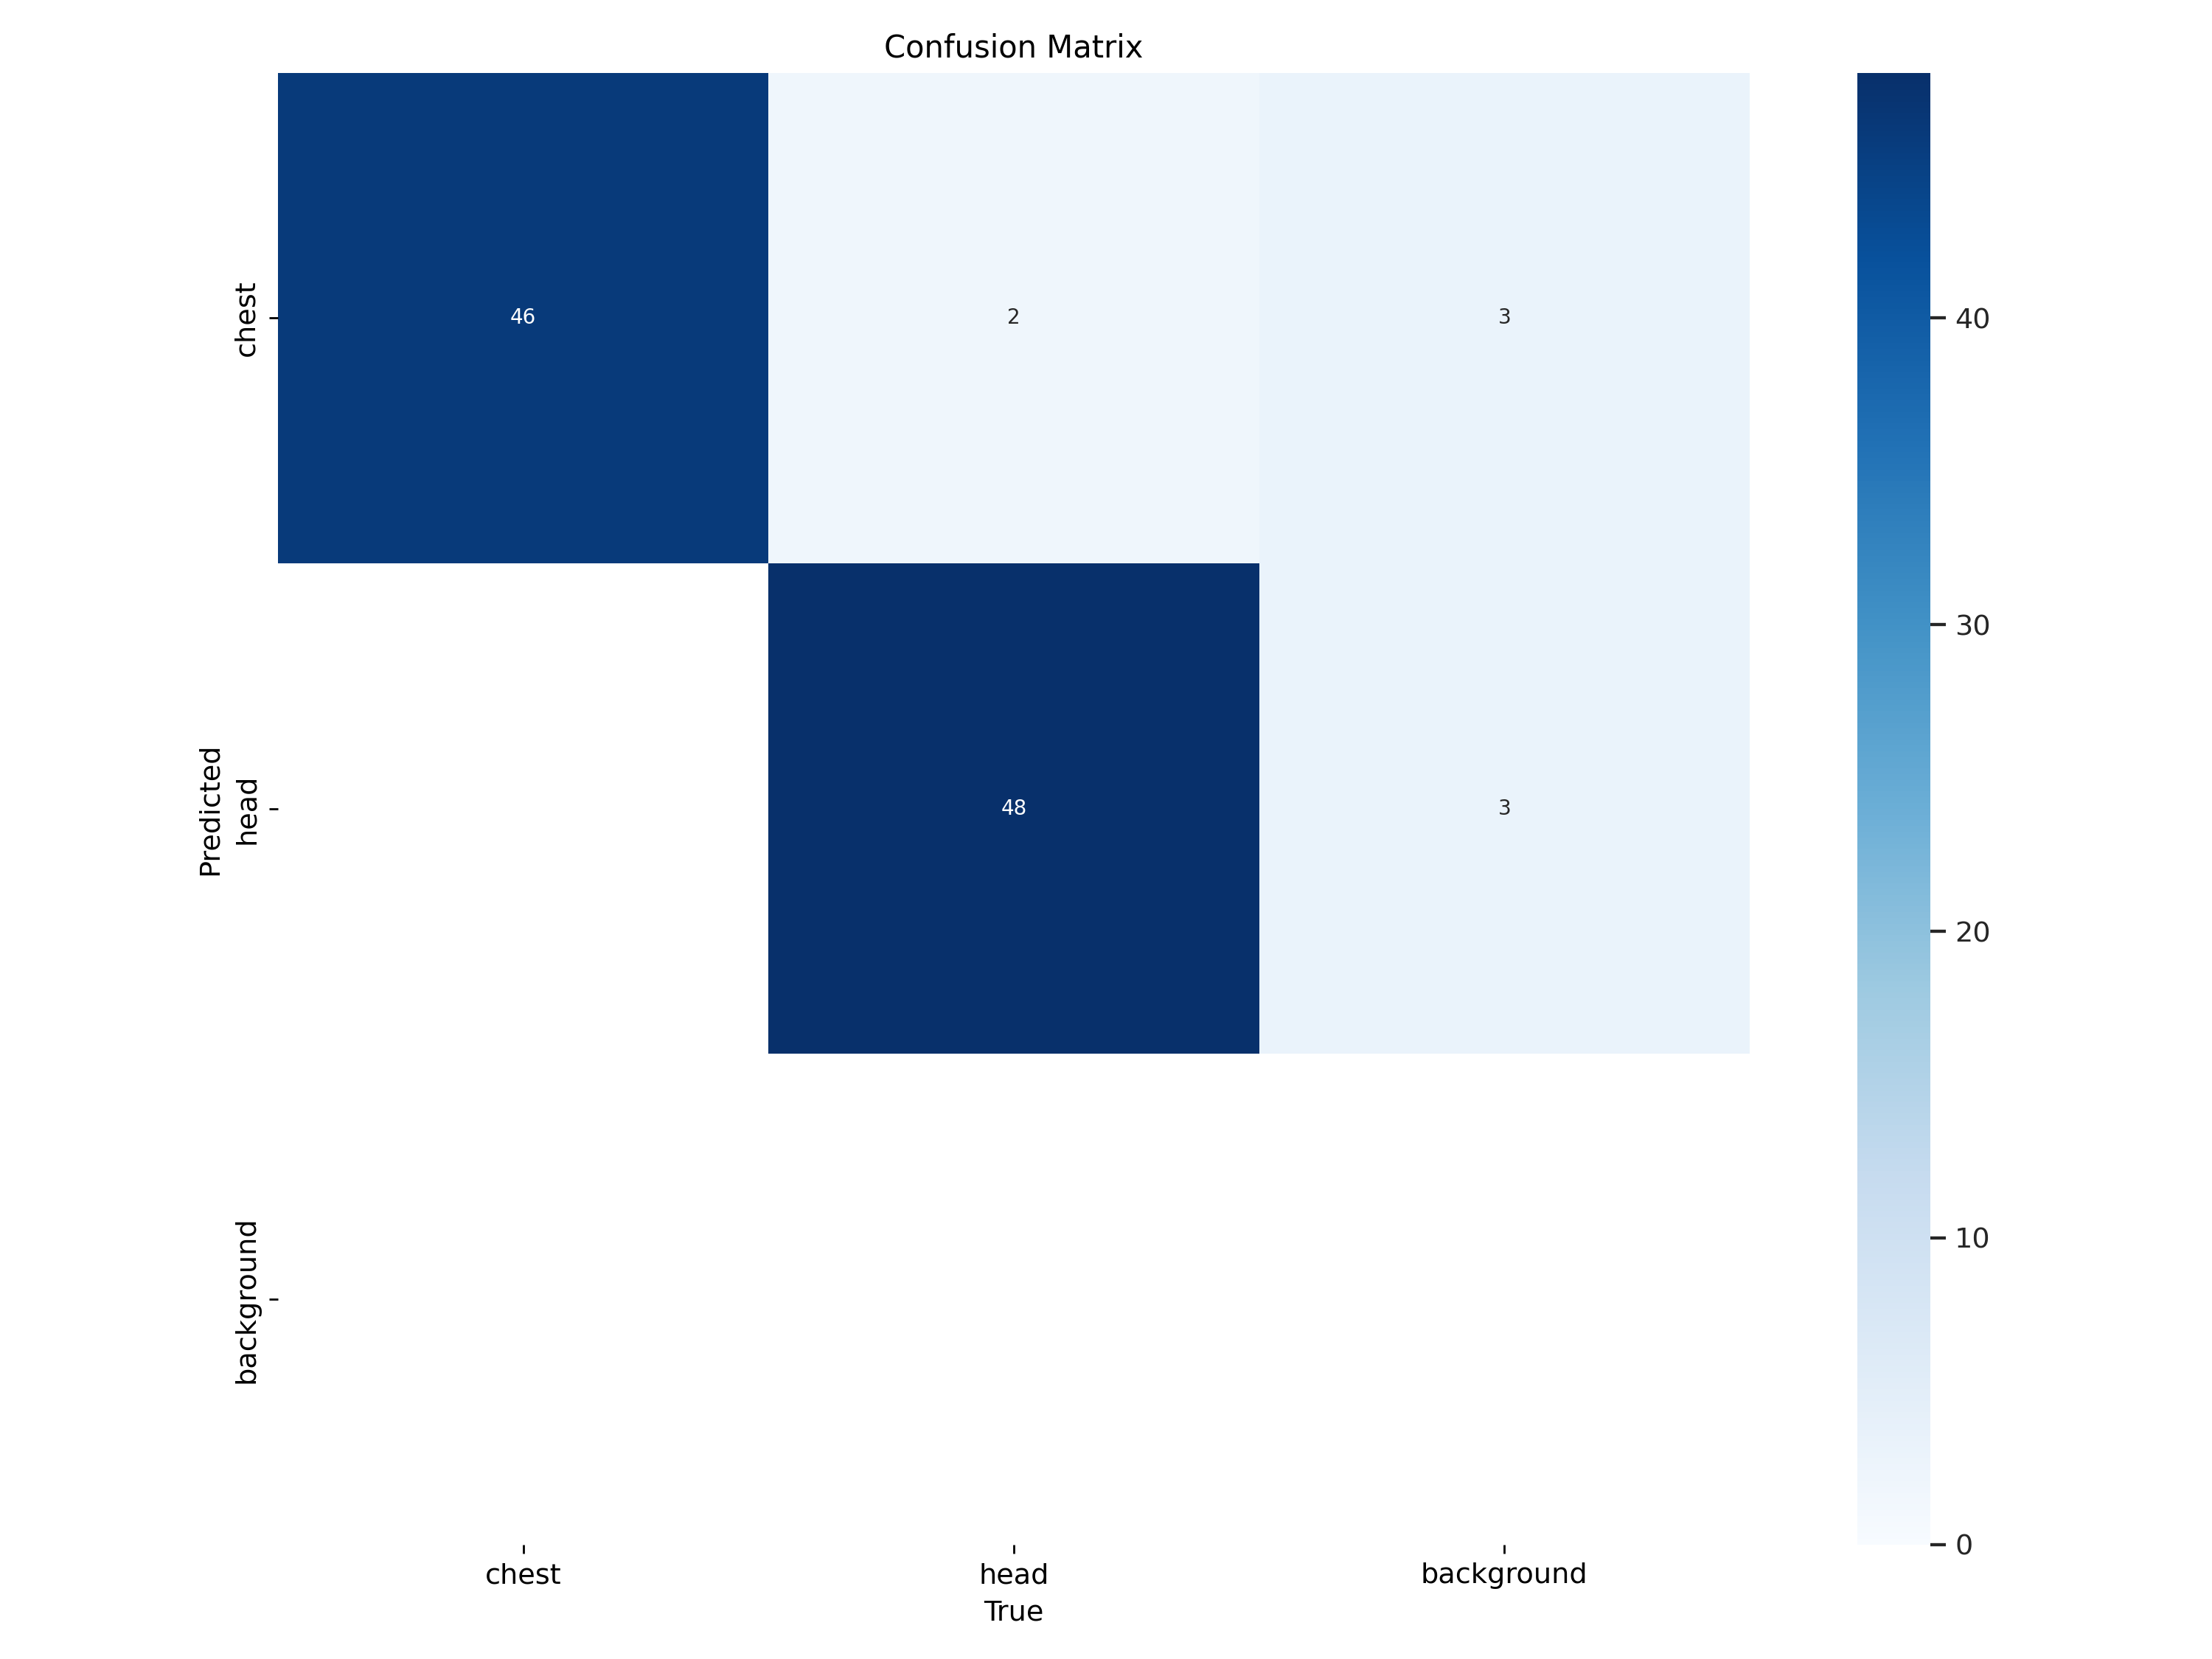

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


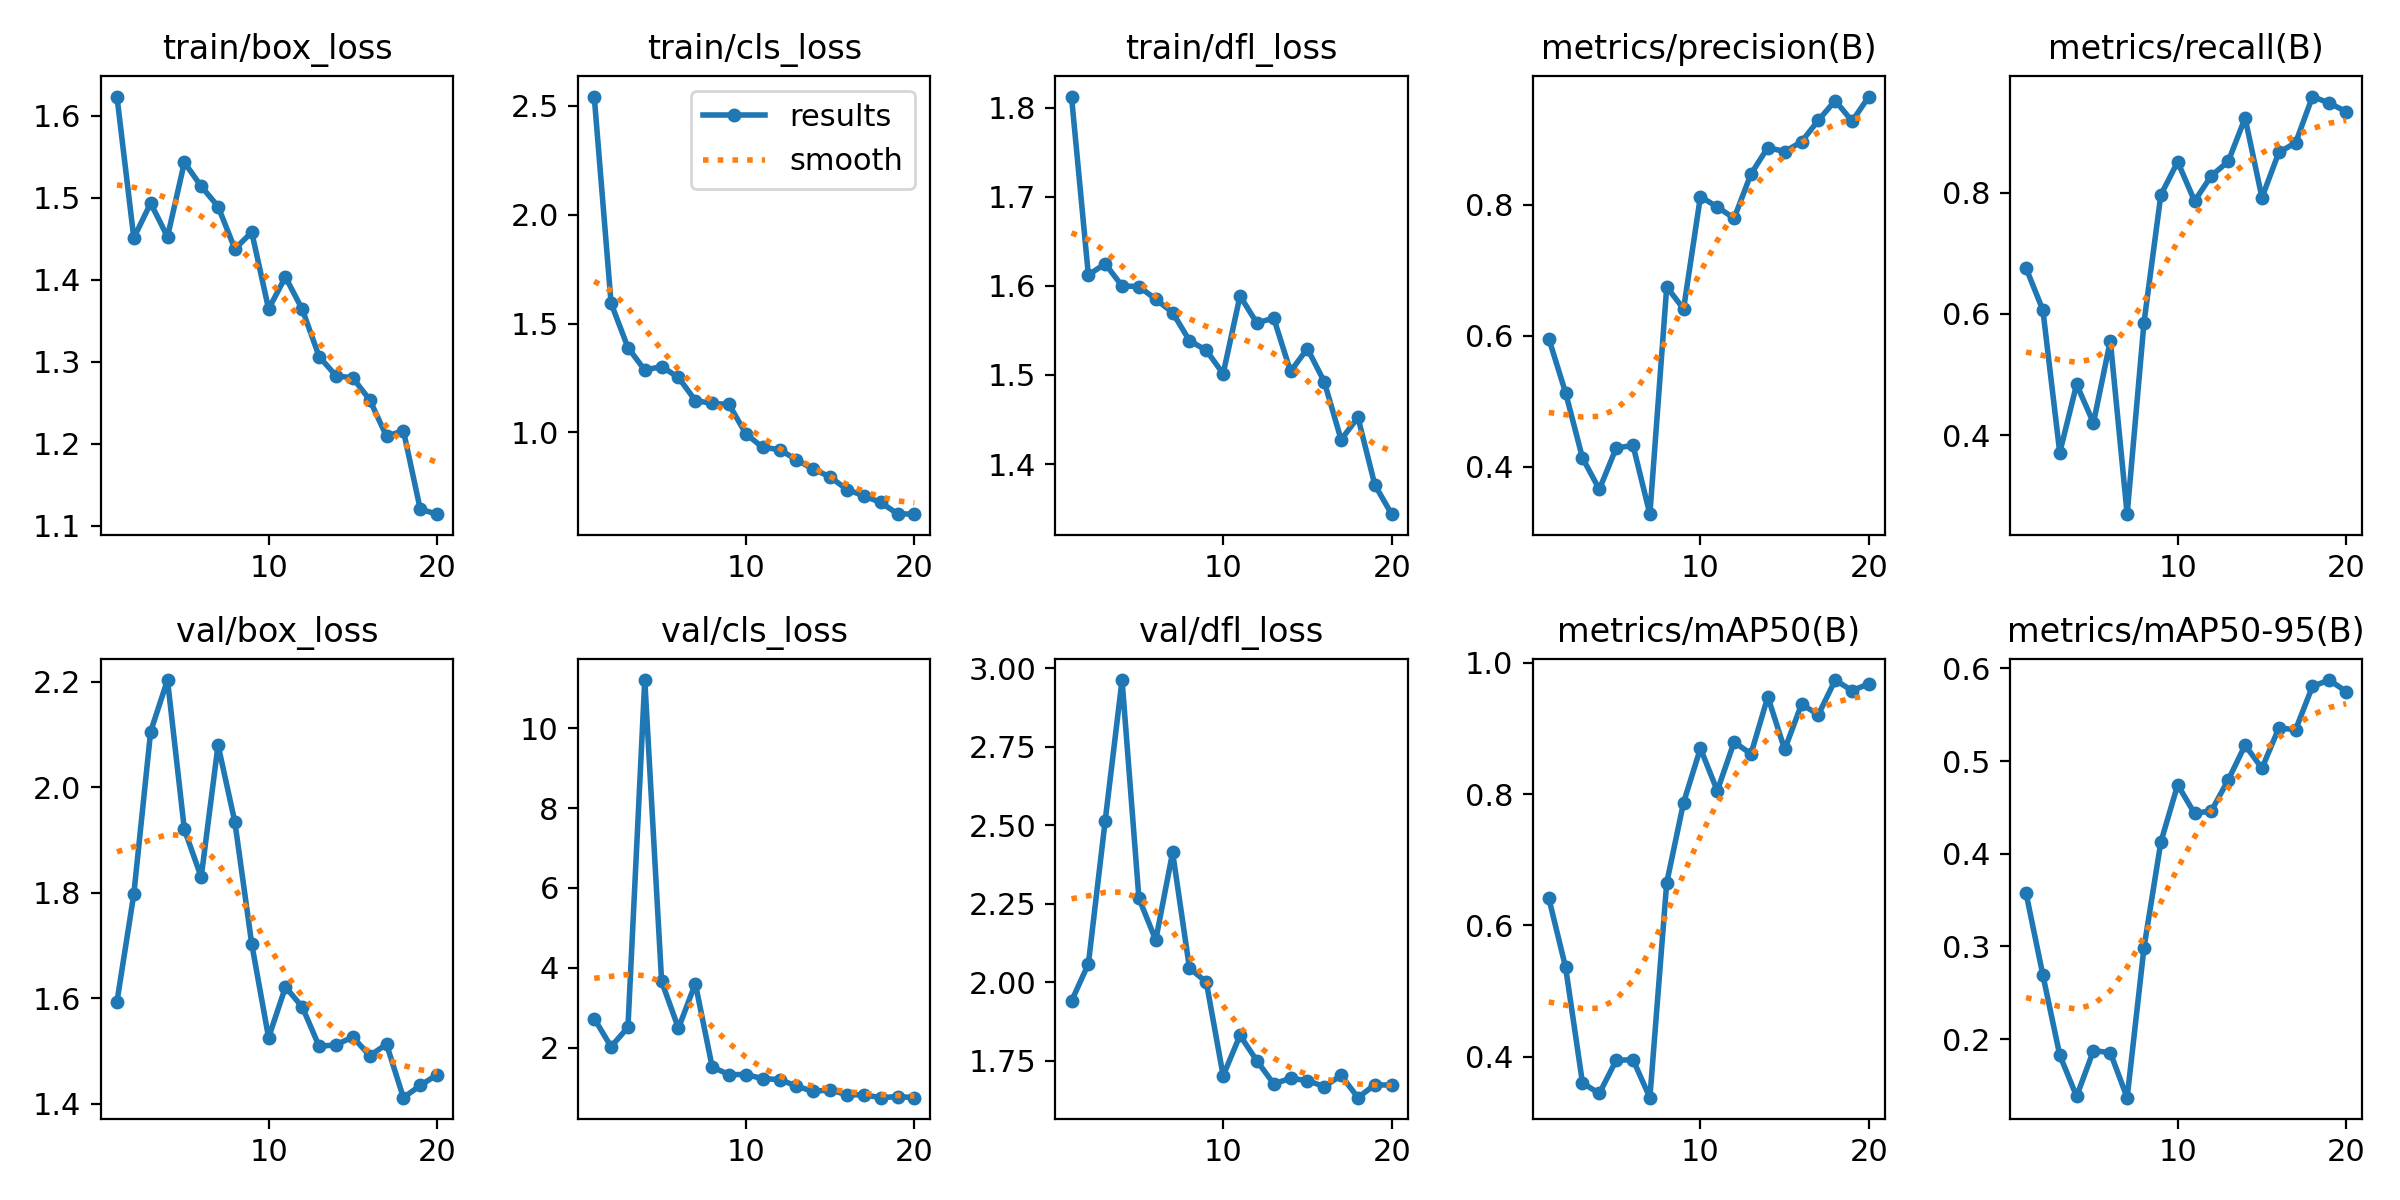

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


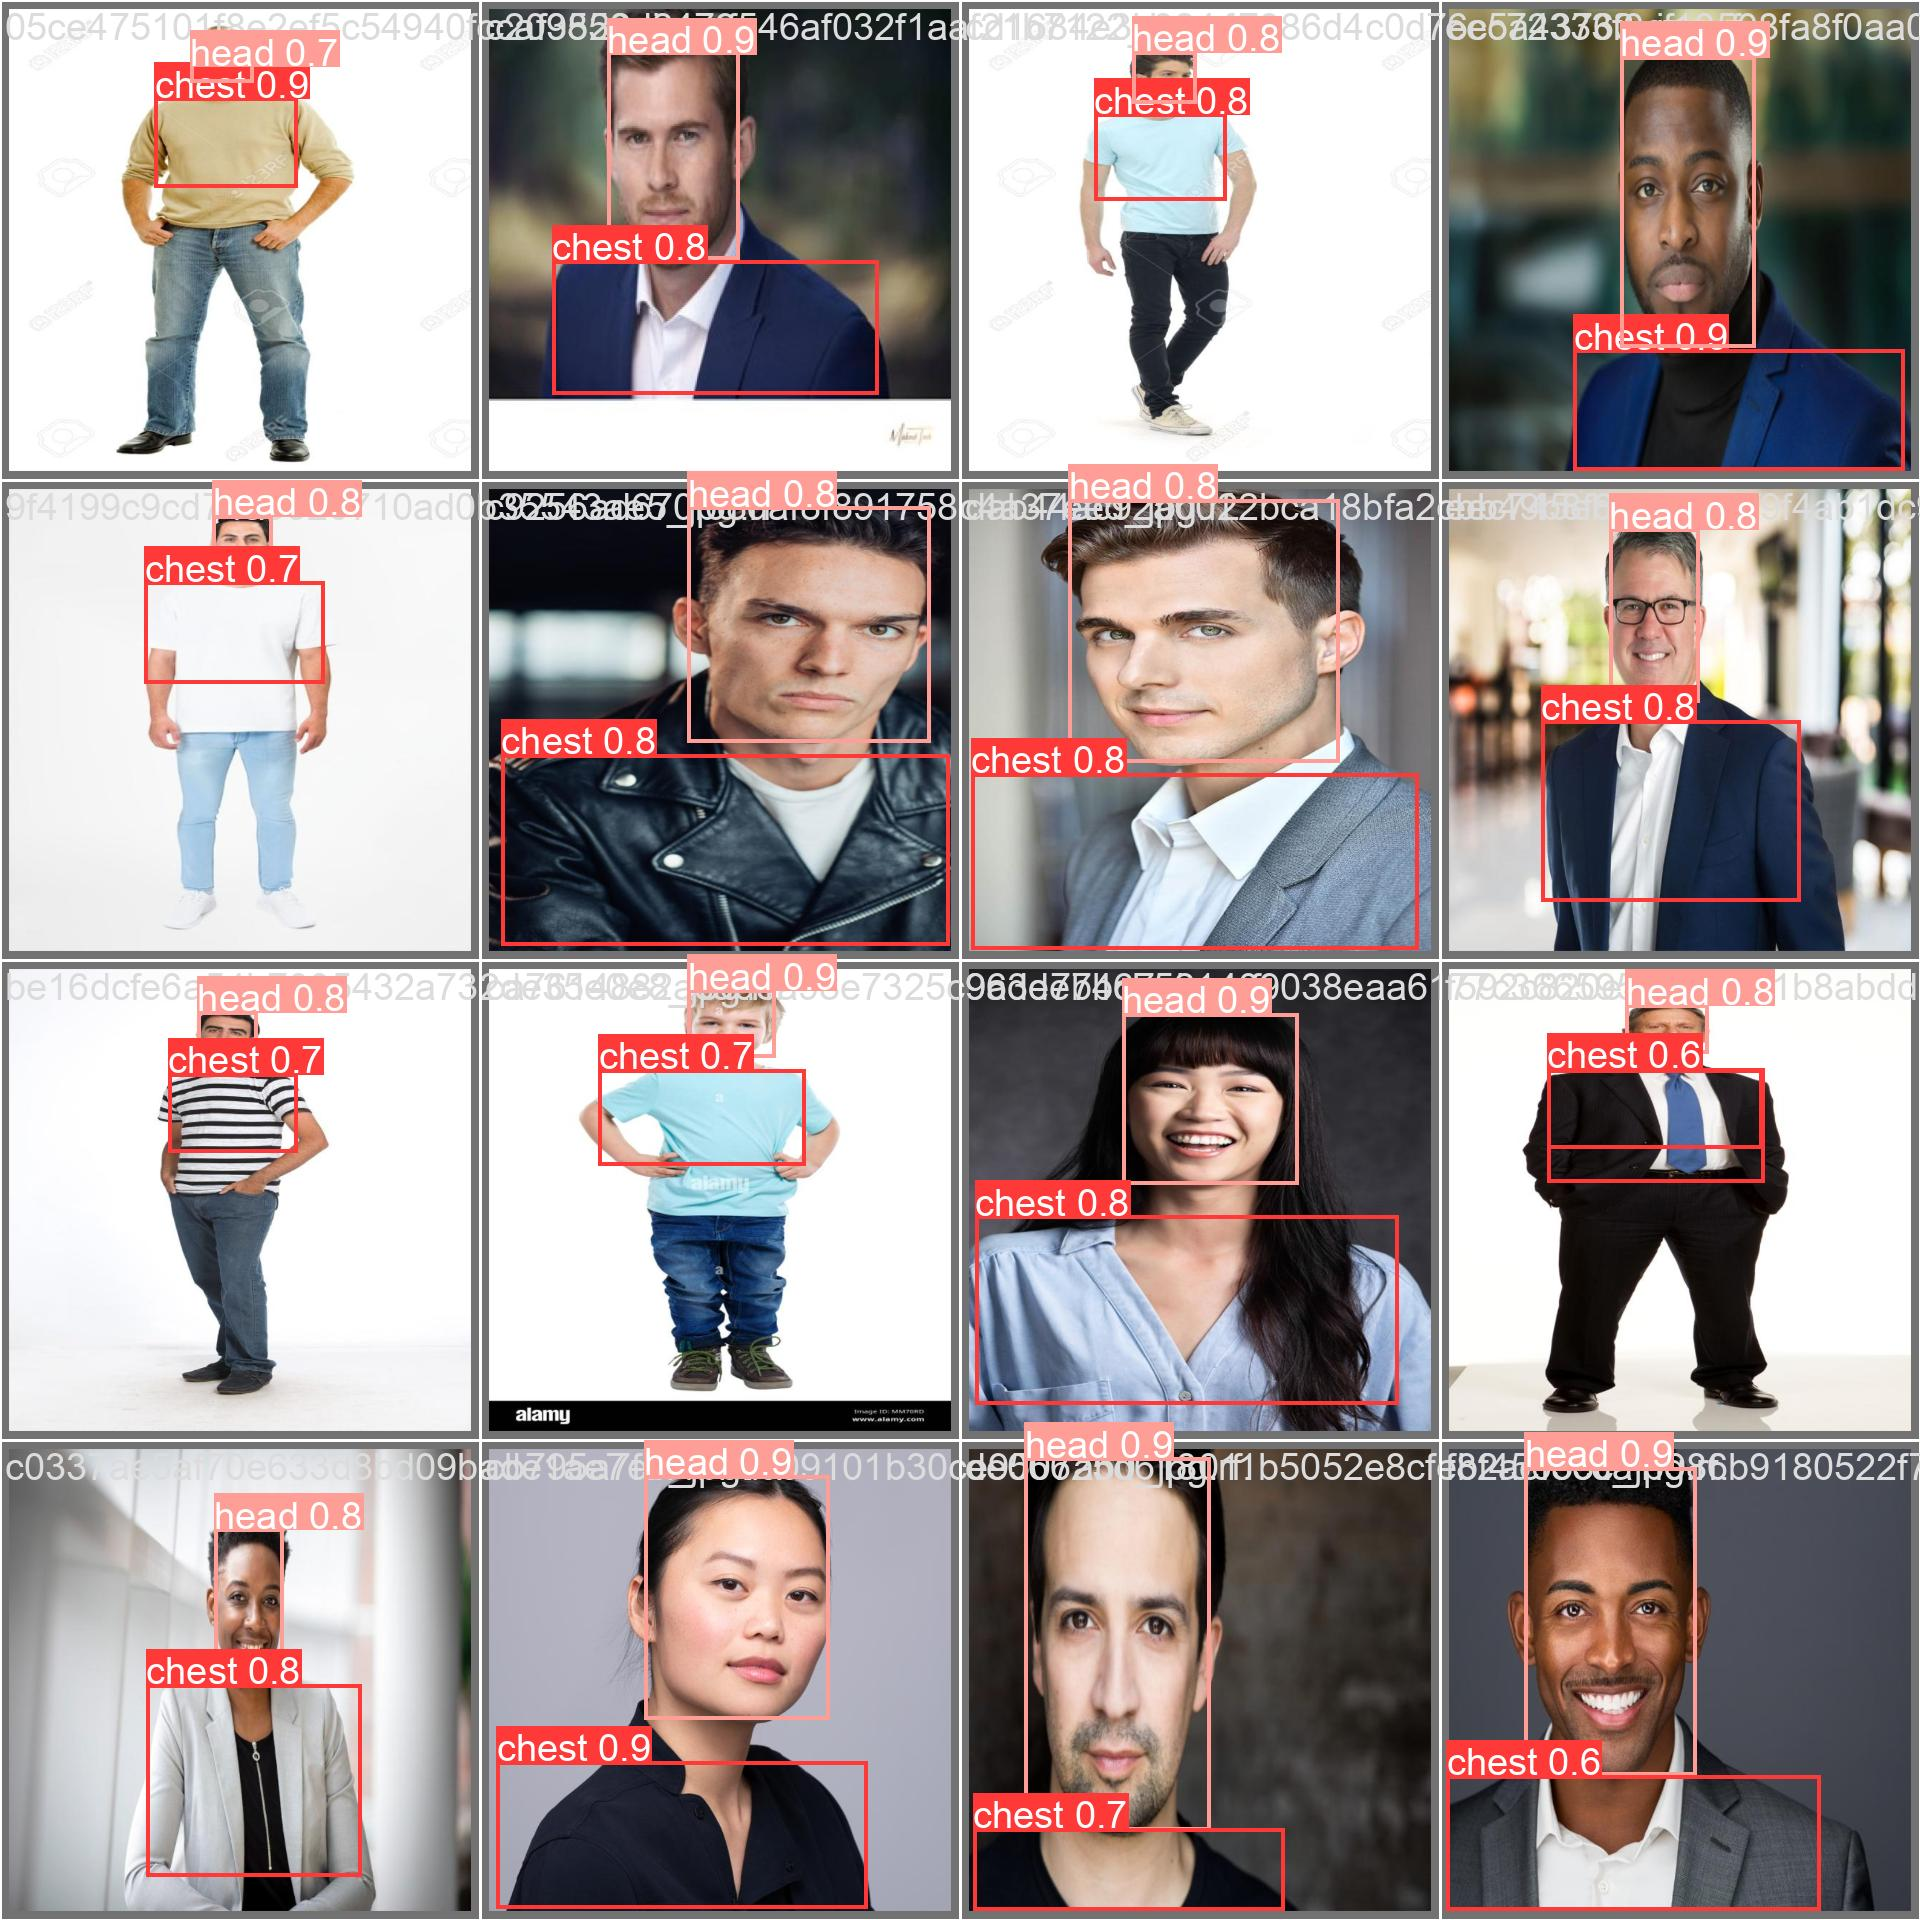

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/AiB_img-3/valid/labels.cache... 48 images, 0 backgrounds, 0 corrupt: 100% 48/48 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:33<00:00, 11.10s/it]
                   all         48         96      0.927      0.947      0.958      0.587
                 chest         48         46      0.904      0.935      0.954      0.506
                  head         48         50      0.951       0.96      0.961      0.668
Speed: 11.9ms preprocess, 658.1ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

image 1/25 /content/datasets/AiB_img-3/test/images/05b856af25ad08b80f5a4ad11b05312a_jpg.rf.2713e1753ecd609ac96226c8f09eb6cb.jpg: 800x800 1 chest, 1 head, 520.0ms
image 2/25 /content/datasets/AiB_img-3/test/images/0d6d0f99704e01bc29edd1aa57fe067e_jpg.rf.94a5fed790ede4cc1d6d422338dbe298.jpg: 800x800 (no detections), 496.3ms
image 3/25 /content/datasets/AiB_img-3/test/images/0e9d6bbe017e259cfdffbc167b463b34_jpg.rf.795ce65231a91abccb1d2f517c2a4328.jpg: 800x800 1 chest, 1 head, 483.2ms
image 4/25 /content/datasets/AiB_img-3/test/images/1fd6d674cb3e4739fab70216d5ea6f76_jpg.rf.696893394770d727b445491edf93b210.jpg: 800x800 1 chest, 1 head, 455.5ms
image 5/25 /content/datasets/AiB_img-3/test/images/2f2a1c8d51bfba552abbd7f1eb1dc035_jpg.rf.87eac7c126a4587d38fcf6fb21ccfb24.jpg: 800x800 1 chest, 1 head, 502.1ms
image 6/25 /co

**NOTE:** Let's take a look at few results.


0: 800x480 1 chest, 1 head, 393.8ms
Speed: 4.1ms preprocess, 393.8ms inference, 1.2ms postprocess per image at shape (1, 3, 800, 480)

0: 800x480 1 chest, 1 head, 324.2ms
Speed: 4.8ms preprocess, 324.2ms inference, 1.0ms postprocess per image at shape (1, 3, 800, 480)

0: 800x480 1 chest, 1 head, 300.8ms
Speed: 3.4ms preprocess, 300.8ms inference, 1.1ms postprocess per image at shape (1, 3, 800, 480)

0: 800x480 1 chest, 1 head, 372.1ms
Speed: 4.6ms preprocess, 372.1ms inference, 1.1ms postprocess per image at shape (1, 3, 800, 480)

0: 800x480 1 chest, 1 head, 381.4ms
Speed: 4.3ms preprocess, 381.4ms inference, 1.1ms postprocess per image at shape (1, 3, 800, 480)

0: 800x480 1 chest, 1 head, 317.1ms
Speed: 3.4ms preprocess, 317.1ms inference, 1.1ms postprocess per image at shape (1, 3, 800, 480)

0: 800x480 1 chest, 1 head, 320.0ms
Speed: 3.4ms preprocess, 320.0ms inference, 1.1ms postprocess per image at shape (1, 3, 800, 480)

0: 800x480 1 chest, 1 head, 305.8ms
Speed: 3.5ms prepr

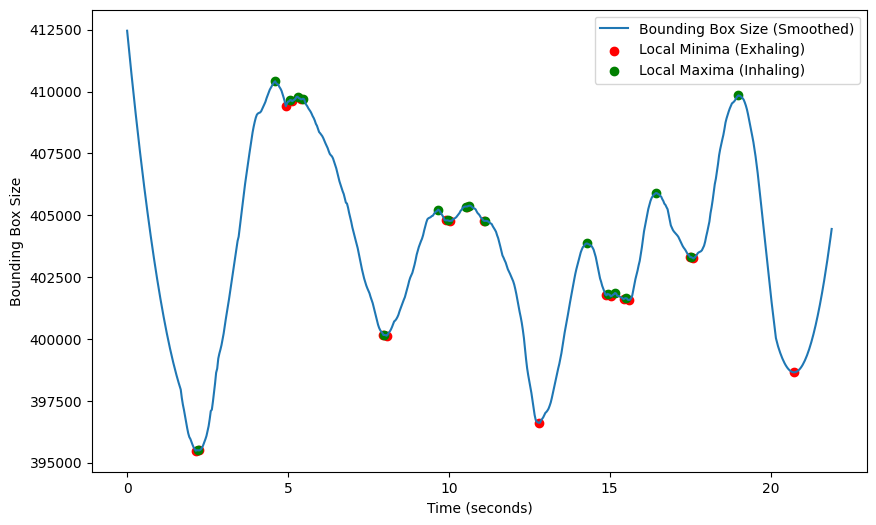

Exhaling event at time 2.13s
Exhaling event at time 2.23s
Exhaling event at time 4.93s
Exhaling event at time 5.13s
Exhaling event at time 5.40s
Exhaling event at time 7.97s
Exhaling event at time 8.07s
Exhaling event at time 9.90s
Exhaling event at time 10.03s
Exhaling event at time 10.57s
Exhaling event at time 11.10s
Exhaling event at time 12.80s
Exhaling event at time 14.90s
Exhaling event at time 15.03s
Exhaling event at time 15.43s
Exhaling event at time 15.60s
Exhaling event at time 17.50s
Exhaling event at time 17.60s
Exhaling event at time 20.73s
Inhaling event at time 2.20s
Inhaling event at time 4.60s
Inhaling event at time 5.07s
Inhaling event at time 5.30s
Inhaling event at time 5.47s
Inhaling event at time 8.00s
Inhaling event at time 9.67s
Inhaling event at time 9.97s
Inhaling event at time 10.53s
Inhaling event at time 10.63s
Inhaling event at time 11.13s
Inhaling event at time 14.30s
Inhaling event at time 14.93s
Inhaling event at time 15.17s
Inhaling event at time 15.

In [ ]:
# Import necessary libraries
import cv2
import numpy as np
from PIL import Image as PILImage
from scipy.signal import argrelextrema, savgol_filter
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO(f'{HOME}/runs/detect/train/weights/best.pt')

# Function to calculate bounding box size
def calculate_bbox_size(bbox):
    x1, y1, x2, y2 = bbox
    width = x2 - x1
    height = y2 - y1
    return width * height

# Function to get bounding boxes from YOLO output
def get_bounding_boxes(predictions):
    bboxes = []
    for pred in predictions:
        x1, y1, x2, y2, conf = pred[:5]  # Extracting only the bounding box coordinates and confidence
        bboxes.append((x1, y1, x2, y2))
    return bboxes

# Apply Savitzky-Golay filter to smooth the size data
def smooth_data(data, window_size=101, poly_order=2):
    return savgol_filter(data, window_size, poly_order)

# Initialize lists to store sizes and times
sizes = []
timestamps = []

# Use a pre-recorded video file instead of webcam
video_path = '/content/runs/detect/breathtrack.mp4'  # Replace with your video file path
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video stream.")
    exit()

frame_rate = cap.get(cv2.CAP_PROP_FPS)
if frame_rate == 0:
    print("Error: Could not retrieve frame rate.")
    exit()

# Set up the video writer to save the output
output_path = '/content/runs/detect/output_video-3.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
output_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
out = cv2.VideoWriter(output_path, fourcc, frame_rate, output_size)

# Process frames in real-time
frame_count = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to PIL Image
    pil_img = PILImage.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

    # Run YOLOv8 model on the frame
    results = model(pil_img)
    predictions = results[0].boxes.data.cpu().numpy()  # Extract the predictions

    # Get bounding boxes
    bboxes = get_bounding_boxes(predictions)

    if bboxes:
        # Assume one bounding box for chest detection
        bbox = bboxes[0]
        size = calculate_bbox_size(bbox)
        sizes.append(size)

        # Calculate time elapsed
        time_in_seconds = frame_count / frame_rate
        timestamps.append(time_in_seconds)
        frame_count += 1

        # Draw the bounding box on the frame
        x1, y1, x2, y2 = map(int, bbox)
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(frame, f"Size: {size}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Save the frame to the output video
    out.write(frame)

# Release the video capture and writer objects
cap.release()
out.release()

# Convert lists to numpy arrays
sizes = np.array(sizes)
timestamps = np.array(timestamps)

# Apply Savitzky-Golay filter to smooth the size data
smoothed_sizes = smooth_data(sizes)

# Adjust timestamps to match the smoothed data
smoothed_timestamps = timestamps[:len(smoothed_sizes)]

# Detect local minima and maxima on smoothed data
local_minima = argrelextrema(smoothed_sizes, np.less)[0]
local_maxima = argrelextrema(smoothed_sizes, np.greater)[0]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(smoothed_timestamps, smoothed_sizes, label='Bounding Box Size (Smoothed)')
plt.scatter(smoothed_timestamps[local_minima], smoothed_sizes[local_minima], color='red', label='Local Minima (Exhaling)')
plt.scatter(smoothed_timestamps[local_maxima], smoothed_sizes[local_maxima], color='green', label='Local Maxima (Inhaling)')
plt.xlabel('Time (seconds)')
plt.ylabel('Bounding Box Size')
plt.legend()
plt.show()

# Output inhaling and exhaling events
for min_idx in local_minima:
    print(f"Exhaling event at time {smoothed_timestamps[min_idx]:.2f}s")
for max_idx in local_maxima:
    print(f"Inhaling event at time {smoothed_timestamps[max_idx]:.2f}s")

# Map smoothed data points back to frame indices
def map_to_frames(timestamps, smoothed_indices, frame_rate):
    return [int(timestamps[idx] * frame_rate) for idx in smoothed_indices]

# Frame indices for local minima and maxima
local_minima_frames = map_to_frames(timestamps, local_minima, frame_rate)
local_maxima_frames = map_to_frames(timestamps, local_maxima, frame_rate)

# Add labels to the video indicating "Inhale" or "Exhale"
cap = cv2.VideoCapture(video_path)
out = cv2.VideoWriter('labeled_' + output_path, fourcc, frame_rate, output_size)

frame_count = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Calculate time elapsed
    time_in_seconds = frame_count / frame_rate

    # Draw the bounding box on the frame
    if frame_count < len(sizes):
        size = sizes[frame_count]
        bbox = bboxes[0]  # Assuming we are using the first bbox for simplicity
        x1, y1, x2, y2 = map(int, bbox)
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(frame, f"Size: {size}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Check if it's an inhale or exhale moment
        if frame_count in local_minima_frames:
            cv2.putText(frame, 'Exhale', (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
        elif frame_count in local_maxima_frames:
            cv2.putText(frame, 'Inhale', (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Save the frame to the output video
    out.write(frame)
    frame_count += 1

# Release the video capture and writer objects
cap.release()
out.release()


In [ ]:
output_path = '/content/runs/detect/output_video.mp4'

In [ ]:
# version 2
# Import necessary libraries
import cv2
import numpy as np
from PIL import Image as PILImage
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO(f'/content/runs/detect/train/weights/best.pt')

# Function to calculate bounding box size
def calculate_bbox_size(bbox):
    x1, y1, x2, y2 = bbox
    width = x2 - x1
    height = y2 - y1
    return width * height

# Function to get bounding boxes from YOLO output
def get_bounding_boxes(predictions):
    bboxes = []
    for pred in predictions:
        x1, y1, x2, y2, conf = pred[:5]  # Extracting only the bounding box coordinates and confidence
        bboxes.append((x1, y1, x2, y2))
    return bboxes

# Apply a simple moving average filter to smooth the size data
def smooth_data(data, window_size=5):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Initialize lists to store sizes and times
sizes = []
timestamps = []

# Use a pre-recorded video file instead of webcam
video_path = '/content/runs/detect/breathtrack.mp4'  # Replace with your video file path
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video stream.")
    exit()

frame_rate = cap.get(cv2.CAP_PROP_FPS)
if frame_rate == 0:
    print("Error: Could not retrieve frame rate.")
    exit()

# Set up the video writer to save the output
output_path = 'output_video.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
output_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
out = cv2.VideoWriter(output_path, fourcc, frame_rate, output_size)

# Process frames in real-time
frame_count = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to PIL Image
    pil_img = PILImage.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

    # Run YOLOv8 model on the frame
    results = model(pil_img)
    predictions = results[0].boxes.data.cpu().numpy()  # Extract the predictions

    # Get bounding boxes
    bboxes = get_bounding_boxes(predictions)

    if bboxes:
        # Assume one bounding box for chest detection
        bbox = bboxes[0]
        size = calculate_bbox_size(bbox)
        sizes.append(size)

        # Calculate time elapsed
        time_in_seconds = frame_count / frame_rate
        timestamps.append(time_in_seconds)
        frame_count += 1

        # Draw the bounding box on the frame
        x1, y1, x2, y2 = map(int, bbox)
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(frame, f"Size: {size}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Save the frame to the output video
    out.write(frame)

# Release the video capture and writer objects
cap.release()
out.release()

# Convert lists to numpy arrays
sizes = np.array(sizes)
timestamps = np.array(timestamps)

# Apply smoothing to the size data
smoothed_sizes = smooth_data(sizes)

# Adjust timestamps to match the smoothed data
smoothed_timestamps = timestamps[:len(smoothed_sizes)]

# Detect local minima and maxima on smoothed data
local_minima = argrelextrema(smoothed_sizes, np.less)[0]
local_maxima = argrelextrema(smoothed_sizes, np.greater)[0]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(smoothed_timestamps, smoothed_sizes, label='Bounding Box Size (Smoothed)')
plt.scatter(smoothed_timestamps[local_minima], smoothed_sizes[local_minima], color='red', label='Local Minima (Exhaling)')
plt.scatter(smoothed_timestamps[local_maxima], smoothed_sizes[local_maxima], color='green', label='Local Maxima (Inhaling)')
plt.xlabel('Time (seconds)')
plt.ylabel('Bounding Box Size')
plt.legend()
plt.show()

# Output inhaling and exhaling events
for min_idx in local_minima:
    print(f"Exhaling event at time {smoothed_timestamps[min_idx]:.2f}s")
for max_idx in local_maxima:
    print(f"Inhaling event at time {smoothed_timestamps[max_idx]:.2f}s")

# Add labels to the video indicating "Inhale" or "Exhale"
cap = cv2.VideoCapture(video_path)
out = cv2.VideoWriter('labeled_' + output_path, fourcc, frame_rate, output_size)

frame_count = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Calculate time elapsed
    time_in_seconds = frame_count / frame_rate

    # Draw the bounding box on the frame
    if frame_count < len(smoothed_sizes):
        size = smoothed_sizes[frame_count]
        bbox = bboxes[0]  # Assuming we are using the first bbox for simplicity
        x1, y1, x2, y2 = map(int, bbox)
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(frame, f"Size: {size}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Check if it's an inhale or exhale moment
        if frame_count in local_minima:
            cv2.putText(frame, 'Exhale', (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
        elif frame_count in local_maxima:
            cv2.putText(frame, 'Inhale', (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Save the frame to the output video
    out.write(frame)
    frame_count += 1

# Release the video capture and writer objects
cap.release()
out.release()



0: 800x480 1 chest, 1 head, 366.4ms
Speed: 6.0ms preprocess, 366.4ms inference, 1.5ms postprocess per image at shape (1, 3, 800, 480)

0: 800x480 1 chest, 1 head, 300.1ms
Speed: 3.4ms preprocess, 300.1ms inference, 1.4ms postprocess per image at shape (1, 3, 800, 480)

0: 800x480 1 chest, 1 head, 299.6ms
Speed: 3.5ms preprocess, 299.6ms inference, 1.0ms postprocess per image at shape (1, 3, 800, 480)

0: 800x480 1 chest, 1 head, 305.2ms
Speed: 3.4ms preprocess, 305.2ms inference, 1.0ms postprocess per image at shape (1, 3, 800, 480)

0: 800x480 1 chest, 1 head, 338.0ms
Speed: 3.4ms preprocess, 338.0ms inference, 1.1ms postprocess per image at shape (1, 3, 800, 480)

0: 800x480 1 chest, 1 head, 360.5ms
Speed: 3.4ms preprocess, 360.5ms inference, 1.2ms postprocess per image at shape (1, 3, 800, 480)

0: 800x480 1 chest, 1 head, 310.4ms
Speed: 3.5ms preprocess, 310.4ms inference, 1.0ms postprocess per image at shape (1, 3, 800, 480)

0: 800x480 1 chest, 1 head, 298.4ms
Speed: 3.4ms prepr

KeyboardInterrupt: 

In [ ]:
#Webcame

# Import necessary libraries
import cv2
import numpy as np
from PIL import Image as PILImage
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt
from ultralytics import YOLO
import time

# Load the YOLOv8 model
model = YOLO(f'/content/runs/detect/train/weights/best.pt')

# Function to calculate bounding box size
def calculate_bbox_size(bbox):
    x1, y1, x2, y2 = bbox
    width = x2 - x1
    height = y2 - y1
    return width * height

# Function to get bounding boxes from YOLO output
def get_bounding_boxes(predictions):
    bboxes = []
    for pred in predictions:
        x1, y1, x2, y2, conf = pred[:5]  # Extracting only the bounding box coordinates and confidence
        bboxes.append((x1, y1, x2, y2))
    return bboxes

# Apply a simple moving average filter to smooth the size data
def smooth_data(data, window_size=5):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Initialize lists to store sizes and times
sizes = []
timestamps = []

# Use webcam instead of pre-recorded video
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

frame_rate = cap.get(cv2.CAP_PROP_FPS)
if frame_rate == 0:
    frame_rate = 30  # Default to 30 FPS if frame rate cannot be determined

# Process frames in real-time
frame_count = 0
start_time = time.time()

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to PIL Image
    pil_img = PILImage.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

    # Run YOLOv8 model on the frame
    results = model(pil_img)
    predictions = results[0].boxes.data.cpu().numpy()  # Extract the predictions

    # Get bounding boxes
    bboxes = get_bounding_boxes(predictions)

    if bboxes:
        # Assume one bounding box for chest detection
        bbox = bboxes[0]
        size = calculate_bbox_size(bbox)
        sizes.append(size)

        # Calculate time elapsed
        time_in_seconds = time.time() - start_time
        timestamps.append(time_in_seconds)
        frame_count += 1

        # Draw the bounding box on the frame
        x1, y1, x2, y2 = map(int, bbox)
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(frame, f"Size: {size}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display the frame
    cv2.imshow('Webcam Feed', frame)

    # Exit if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object
cap.release()
cv2.destroyAllWindows()

# Convert lists to numpy arrays
sizes = np.array(sizes)
timestamps = np.array(timestamps)

# Apply smoothing to the size data
smoothed_sizes = smooth_data(sizes)

# Adjust timestamps to match the smoothed data
smoothed_timestamps = timestamps[:len(smoothed_sizes)]

# Detect local minima and maxima on smoothed data
local_minima = argrelextrema(smoothed_sizes, np.less)[0]
local_maxima = argrelextrema(smoothed_sizes, np.greater)[0]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(smoothed_timestamps, smoothed_sizes, label='Bounding Box Size (Smoothed)')
plt.scatter(smoothed_timestamps[local_minima], smoothed_sizes[local_minima], color='red', label='Local Minima (Exhaling)')
plt.scatter(smoothed_timestamps[local_maxima], smoothed_sizes[local_maxima], color='green', label='Local Maxima (Inhaling)')
plt.xlabel('Time (seconds)')
plt.ylabel('Bounding Box Size')
plt.legend()
plt.show()

# Output inhaling and exhaling events
for min_idx in local_minima:
    print(f"Exhaling event at time {smoothed_timestamps[min_idx]:.2f}s")
for max_idx in local_maxima:
    print(f"Inhaling event at time {smoothed_timestamps[max_idx]:.2f}s")


Error: Could not open webcam.


ValueError: v cannot be empty

In [ ]:
from IPython.display import display, Javascript, Image
#from google.colab.output import eval_js
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

In [ ]:
import cv2
import numpy as np
from PIL import Image as PILImage
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt
from ultralytics import YOLO
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import io
import time

# Load the YOLOv8 model
model = YOLO(f'/content/runs/detect/train/weights/best.pt')  # Update the path to your YOLO model

# Function to calculate bounding box size
def calculate_bbox_size(bbox):
    x1, y1, x2, y2 = bbox
    width = x2 - x1
    height = y2 - y1
    return width * height

# Function to get bounding boxes from YOLO output
def get_bounding_boxes(predictions):
    bboxes = []
    for pred in predictions:
        x1, y1, x2, y2, conf = pred[:5]  # Extracting only the bounding box coordinates and confidence
        bboxes.append((x1, y1, x2, y2))
    return bboxes

# Apply a simple moving average filter to smooth the size data
def smooth_data(data, window_size=5):
    if len(data) < window_size:
        return data  # Return the original data if it's too short to smooth
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Convert JavaScript object to OpenCV image
def js_to_image(js_reply):
    image_bytes = b64decode(js_reply.split(',')[1])
    jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
    img = cv2.imdecode(jpg_as_np, flags=1)
    return img

# Convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
    bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
    iobuf = io.BytesIO()
    bbox_PIL.save(iobuf, format='png')
    bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))
    return bbox_bytes

# JavaScript code to capture video from webcam
def video_stream():
    js = Javascript('''
        var video;
        var div = null;
        var stream;
        var captureCanvas;
        var imgElement;
        var labelElement;

        var pendingResolve = null;
        var shutdown = false;

        function removeDom() {
            stream.getVideoTracks()[0].stop();
            video.remove();
            div.remove();
            video = null;
            div = null;
            stream = null;
            imgElement = null;
            captureCanvas = null;
            labelElement = null;
        }

        function onAnimationFrame() {
            if (!shutdown) {
                window.requestAnimationFrame(onAnimationFrame);
            }
            if (pendingResolve) {
                var result = "";
                if (!shutdown) {
                    captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
                    result = captureCanvas.toDataURL('image/jpeg', 0.8)
                }
                var lp = pendingResolve;
                pendingResolve = null;
                lp(result);
            }
        }

        async function createDom() {
            if (div !== null) {
                return stream;
            }

            div = document.createElement('div');
            div.style.border = '2px solid black';
            div.style.padding = '3px';
            div.style.width = '100%';
            div.style.maxWidth = '600px';
            document.body.appendChild(div);

            const modelOut = document.createElement('div');
            modelOut.innerHTML = "<span>Status:</span>";
            labelElement = document.createElement('span');
            labelElement.innerText = 'No data';
            labelElement.style.fontWeight = 'bold';
            modelOut.appendChild(labelElement);
            div.appendChild(modelOut);

            video = document.createElement('video');
            video.style.display = 'block';
            video.width = div.clientWidth - 6;
            video.setAttribute('playsinline', '');
            video.onclick = () => { shutdown = true; };
            stream = await navigator.mediaDevices.getUserMedia(
                {video: { facingMode: "environment"}});
            div.appendChild(video);

            imgElement = document.createElement('img');
            imgElement.style.position = 'absolute';
            imgElement.style.zIndex = 1;
            imgElement.onclick = () => { shutdown = true; };
            div.appendChild(imgElement);

            const instruction = document.createElement('div');
            instruction.innerHTML =
                '<span style="color: red; font-weight: bold;">' +
                'When finished, click here or on the video to stop this demo</span>';
            div.appendChild(instruction);
            instruction.onclick = () => { shutdown = true; };

            video.srcObject = stream;
            await video.play();

            captureCanvas = document.createElement('canvas');
            captureCanvas.width = 640; //video.videoWidth;
            captureCanvas.height = 480; //video.videoHeight;
            window.requestAnimationFrame(onAnimationFrame);

            return stream;
        }

        async function stream_frame(label, imgData) {
            if (shutdown) {
                removeDom();
                shutdown = false;
                return '';
            }

            var preCreate = Date.now();
            stream = await createDom();

            var preShow = Date.now();
            if (label != "") {
                labelElement.innerHTML = label;
            }

            if (imgData != "") {
                var videoRect = video.getClientRects()[0];
                imgElement.style.top = videoRect.top + "px";
                imgElement.style.left = videoRect.left + "px";
                imgElement.style.width = videoRect.width + "px";
                imgElement.style.height = videoRect.height + "px";
                imgElement.src = imgData;
            }

            var preCapture = Date.now();
            var result = await new Promise(function(resolve, reject) {
                pendingResolve = resolve;
            });
            shutdown = false;

            return {'create': preShow - preCreate,
                    'show': preCapture - preShow,
                    'capture': Date.now() - preCapture,
                    'img': result};
        }
    ''')
    display(js)

def video_frame(label, bbox):
    data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
    return data

# Start video streaming
video_stream()
label_html = 'Capturing...'
bbox = ''
count = 0

# Initialize lists to store sizes and times
sizes = []
timestamps = []

frame_count = 0
start_time = time.time()

while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # Convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"])

    # Convert frame to PIL Image
    pil_img = PILImage.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

    # Run YOLOv8 model on the frame
    results = model(pil_img)
    predictions = results[0].boxes.data.cpu().numpy()  # Extract the predictions

    # Get bounding boxes
    bboxes = get_bounding_boxes(predictions)

    if bboxes:
        # Assume one bounding box for chest detection
        bbox = bboxes[0]
        size = calculate_bbox_size(bbox)
        sizes.append(size)

        # Calculate time elapsed
        time_in_seconds = time.time() - start_time
        timestamps.append(time_in_seconds)
        frame_count += 1

        # Draw the bounding box on the frame
        x1, y1, x2, y2 = map(int, bbox)
        bbox_array = np.zeros([480, 640, 4], dtype=np.uint8)
        bbox_array = cv2.rectangle(bbox_array, (x1, y1), (x2, y2), (0, 255, 0), 2)
        bbox_array[:, :, 3] = (bbox_array.max(axis=2) > 0).astype(int) * 255
        bbox_bytes = bbox_to_bytes(bbox_array)

        cv2.putText(frame, f"Size: {size}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Convert the frame back to base64
    _, img_buffer = cv2.imencode('.jpg', frame)
    img_str = b64encode(img_buffer).decode('utf-8')

    # Update bbox so the next frame gets the new overlay
    bbox = img_str

# Convert lists to numpy arrays
if sizes and timestamps:  # Proceed only if sizes and timestamps are not empty
    sizes = np.array(sizes)
    timestamps = np.array(timestamps)

    # Apply smoothing to the size data
    smoothed_sizes = smooth_data(sizes)

    # Adjust timestamps to match the smoothed data
    smoothed_timestamps = timestamps[:len(smoothed_sizes)]

    # Detect local minima and maxima on smoothed data
    local_minima = argrelextrema(smoothed_sizes, np.less)[0]
    local_maxima = argrelextrema(smoothed_sizes, np.greater)[0]

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(smoothed_timestamps, smoothed_sizes, label='Bounding Box Size (Smoothed)')
    plt.scatter(smoothed_timestamps[local_minima], smoothed_sizes[local_minima], color='red', label='Local Minima (Exhaling)')
    plt.scatter(smoothed_timestamps[local_maxima], smoothed_sizes[local_maxima], color='green', label='Local Maxima (Inhaling)')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Bounding Box Size')
    plt.legend()
    plt.show()

    # Output inhaling and exhaling events
    for min_idx in local_minima:
        print(f"Exhaling event at time {smoothed_timestamps[min_idx]:.2f}s")
    for max_idx in local_maxima:
        print(f"Inhaling event at time {smoothed_timestamps[max_idx]:.2f}s")
else:
    print("No bounding box sizes were recorded.")


<IPython.core.display.Javascript object>

MessageError: NotAllowedError: Permission denied

In [ ]:
import cv2

def capture_image():
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Error: Could not open webcam.")
        return None

    ret, frame = cap.read()
    if not ret:
        print("Error: Failed to capture image.")
        cap.release()
        return None

    cv2.imshow('Captured Image', frame)
    cv2.imwrite('captured_image.jpg', frame)
    cap.release()
    cv2.destroyAllWindows()
    return 'captured_image.jpg'

filename = capture_image()
if filename:
    print(f'Saved to {filename}')
else:
    print("No image captured.")


Error: Could not open webcam.
No image captured.


In [ ]:
import torch
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO(f'/content/best.pt')  # Update the path to your YOLO model

# Convert the YOLO model to a format that can be exported
model.eval()  # Set the model to evaluation mode

# Create a dummy input tensor with the same size as the input expected by the model
dummy_input = torch.randn(1, 3, 256, 256)  # Adjust the size according to your model's input size

# Export the model to ONNX format
torch.onnx.export(model.model,              # model being run
                  dummy_input,              # model input (or a tuple for multiple inputs)
                  "example.onnx",           # where to save the model (can be a file or file-like object)
                  export_params=True,       # store the trained parameter weights inside the model file
                  opset_version=11,         # the ONNX version to export the model to
                  do_constant_folding=True, # whether to execute constant folding for optimization
                  input_names = ['input'],  # the model's input names
                  output_names = ['output'] # the model's output names
                  )


<IPython.core.display.Javascript object>

NotAllowedError: Permission denied


## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
!pip install ultralytics==8.2.35

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 782.8/782.8 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.196
    Uninstalling ultralytics-8.0.196:
      Successfully uninstalled ultralytics-8.0.196


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="jH40XIyGwDeLt7NT5zQL")
project = rf.workspace("the-verse").project("aib_img")
version = project.version(3)
dataset = version.download("yolov8")

project.version(dataset.version).deploy(model_type="yolov8", model_path=f"/content/runs/detect/train/")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.35, to fix: `pip install ultralytics==8.0.196`
Dependency ultralytics==8.0.196 is required but found version=8.2.35, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: n


SystemExit: 1

To exit: use 'exit', 'quit', or Ctrl-D.


In [ ]:
#While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference

In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on img_10_jpg.rf.f4a6f5ca5d29b19fa824e988d85657c0.jpg


HTTPError: 403 Client Error: Forbidden for url: https://detect.roboflow.com/aib_img/1?api_key=jH40XIyGwDeLt7NT5zQL&name=YOUR_IMAGE.jpg&overlap=30&confidence=40&stroke=1&labels=false&format=json

# Deploy Your Model to the Edge

In addition to using the Roboflow hosted API for deployment, you can use [Roboflow Inference](https://inference.roboflow.com), an open source inference solution that has powered millions of API calls in production environments. Inference works with CPU and GPU, giving you immediate access to a range of devices, from the NVIDIA Jetson to TRT-compatible devices to ARM CPU devices.

With Roboflow Inference, you can self-host and deploy your model on-device. You can deploy applications using the [Inference Docker containers](https://inference.roboflow.com/quickstart/docker/) or the pip package.

For example, to install Inference on a device with an NVIDIA GPU, we can use:

```
docker pull roboflow/roboflow-inference-server-gpu
```

Then we can run inference via HTTP:

```python
import requests

workspace_id = ""
model_id = ""
image_url = ""
confidence = 0.75
api_key = ""

infer_payload = {
    "image": {
        "type": "url",
        "value": image_url,
    },
    "confidence": confidence,
    "iou_threshold": iou_thresh,
    "api_key": api_key,
}
res = requests.post(
    f"http://localhost:9001/{workspace_id}/{model_id}",
    json=infer_object_detection_payload,
)

predictions = res.json()
```

Above, set your Roboflow workspace ID, model ID, and API key.

- [Find your workspace and model ID](https://docs.roboflow.com/api-reference/workspace-and-project-ids?ref=blog.roboflow.com)
- [Find your API key](https://docs.roboflow.com/api-reference/authentication?ref=blog.roboflow.com#retrieve-an-api-key)

Also, set the URL of an image on which you want to run inference. This can be a local file.

_To use your YOLOv5 model commercially with Inference, you will need a Roboflow Enterprise license, through which you gain a pass-through license for using YOLOv5. An enterprise license also grants you access to features like advanced device management, multi-model containers, auto-batch inference, and more._

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.